# <center> Bericht: Analog Methode
### <center> UE Klimamodellierung SoSe 2019
### <center>David Hinger, Johannes Mayer

## 1. Einleitung
Diese Projektarbeit beschäftigt sich damit, wie man eine GCM (global circulation model) Projektion auf eine regionale Auflösung downscalen kann. Das wird gemacht, um kleinräumige klimatologische Einflüsse betrachten zu können. GCMs können auf zwei verschieden Arten downgescaled werden. Zum einen mit dynamischen Methoden, zum anderen statistisch. Beim dynamischen Downscaling werden regionale Klimamodelle entwickelt, welche die Daten der GCMs als Randbedingungen verwenden. Diese Modelle führen dann eigenständig Klimaberechnungen durch.

Statistisches Downscaling basiert auf Transferfunktionen, welche zwischen großskalige Prediktoren des GCMs und lokalskalige Prediktoren transferieren. Diese Methoden werden auf die Outputdaten des GCMs angewendet (für den Zeitraum, der von Interesse ist). In dieser Projektarbeit wird die Analogmethode, eine statistische downscaling Methode, auf JRA-55 Reanalysedaten angewendet.

Bei der Analogmethode werden die großskaligen Simulationen des GCMs mit den historischen Beobachtungen verglichen und die Ähnlichste wird als das Analogon ausgewählt. Das gleichzeitig dazu beobachtete lokale Wetter wird dann in Verbindung mit dem simulierten großskaligen Muster gebracht.

Bevor die Methode angewendet werden kann, müssen zuerst die bearbeiteten Daten heruntergeladen werden und diese Daten dann auch im Preprocessing so aufbearbeitet werden, dass sie für die Analogmethode verwendet werden können.
Diese Aktionen, sowie die Durchführung der Analogmethode und der dafür geschriebene Python Code, sind im Folgenden Schritt für Schritt beschrieben.



## 2. Datendownload

In diesem Projekt wird mit den JRA-55 Reanalysedaten gearbeitet. Diese bieten Daten über einen Zeitraum von 61 Jahren an, von 1958 bis 2018. Verwendet werden die 6 stündlich aufgelösten Daten. 

Die Daten können über 3 Anbieter im Internet heruntergeladen werden. Direkt vom *Climate Prediction Division, Global Environment and Marine Department* der *Japan Meteorological Agency*,  dem *DIAS: Data Integration & Analysis System* oder vom Daten Archiv des *NCAR: National Center for Atmospheric Research*. Für alle drei Varianten bedarf es einem Account auf der jeweiligen Seite.

In unserem Fall wurde der Download über das NCAR Archiv durchgeführt (https://rda.ucar.edu/datasets/ds628.0/). Dessen Internetseite ist sehr benutzerfreundlich. Um die JRA-55 Daten zu bekommen muss man sich zuerst mit seinem Account einloggen. Dann hat man die Möglichkeit zu wählen, in welcher Form man die Daten herunterladen will. Hier gibt es auch die Möglichkeit ein räumliches Subset der Daten auszugewählen. Anschließend wählt man den Zeitraum aus. Hier wurde der gesamte Zeitraum von 61 Jahre gewählt.

Als Nächstes müssen die Parameter, die man verwenden möchte, ausgewählt werden. Hier wurde der Druck auf Meeresniveau und die relative und spezifische Feuchte in 700 hPa gewählt. Als Nächstes muss man wählen, in welchem Format man die Daten haben will, die Möglichkeiten sind grib,netcdf oder csv Format.

Als letztes besteht nun noch die Möglichkeit, im Feld *Spacial Selection*, den Kartenausschnitt für den man die Daten haben möchte, zu wählen. Dazu wählt man die Option: *Data within a bounding Box*. Nun kann, entweder mit der Maus auf einer Weltkarte oder durch die Angabe von Koordinaten, ein Ausschnitt definiert werden, für den die Daten benötigt werden. Es wurde ein Ausschnitt gewählt, der durch folgende Länge und Breite definiert ist 𝝺 =[10 °W, 25 °E]; 𝞅 = [32 °N, 68 °N]. Bei einer Auflösung von 1.25 Grad resultiert eine Domäne mit 29x29 Gitterpunkten.

Nach Abschluss der beschriebenen Schritte, sendet man eine Anfrage ab und erhält per Email einen Link zu den Daten, welche dann heruntergeladen werden können.

## 3. Preprocessing
file: 01-NormalizedAnomalies.py

Um die Analogmethode auf die Reanalysedaten anzuwenden, müssen erst die Anomalien der einzelnen Parameter für jeden Tag berechnet werden. Aufgrund der unterschiedlichen Größenordnungen der betrachteten physikalischen Größen müssen die Anomalien auch noch normiert werden. Da die Daten in 6 stündlicher Auflösung vorliegen, müssen davor noch tägliche Mittelwerte gebildet werden. Das Preprocessing wird in folgenden 6 Schritten durchgeführt: 
- Einlesen und aufbereiten der Daten 
- Berechnung der Tagesmittelwerte 
- Berechnung der Mittelwerte eines 'day of year' über alle Jahre 
- Berechnung der Anomalien 
- Berechnung der Standardabweichungen 
- Normierung der Anomalien mittels Standardabweichung


### Einlesen und Aufbereiten der Daten
Zum Einlesen der Daten wird Python's Argument parser verwendet. Hier wird ein default Pfad vorgegeben, ein anderer Datenpfad kann mittels *ipath*-Argument angegeben werden. Die Variablennamen der eingelesenen Daten sind in jedem Reanalysedatensatz anders. Deshalb kann mit weiteren Argumenten (*var1*, *var2*, *var3*) der Variablenname für Zeit, Breiten- und Längengrad verändert werden. Als default werden die Variablennamen des JRA-55 Datensatzes verwendet. 

```python
def_path = '/Users/David/Desktop/JRA-55/'

parser = argparse.ArgumentParser(description='man')
parser.add_argument('--ipath', type=str, help='...', default = def_path)
parser.add_argument('--ifile1', type=str, help='...', default = 'mslp_daily/anl_surf125.002_prmsl.*') 
parser.add_argument('--ifile2', type=str, help='...', default = 'rh_daily/anl_p125.052_rh.*') 
parser.add_argument('--ifile3', type=str, help='...', default = 'spfh_daily/anl_p125.051_spfh.*') 
parser.add_argument('--var1', type=str, help='...', default = 'initial_time0_hours')
parser.add_argument('--var2', type=str, help='...', default = 'g0_lat_1')
parser.add_argument('--var3', type=str, help='...', default = 'g0_lon_2')

args = parser.parse_args()
ipath = args.ipath
ifile1 = args.ifile1
ifile2 = args.ifile2
ifile3 = args.ifile3
var1 = args.var1
var2 = args.var2
var3 = args.var3
```

Nun werden die Daten der einzelnen Parameter mit xarray und den oben definierten Argumenten als ein Dataset über den gesamten Zeitraum eingelesen. 

```python
iData1 = xr.open_mfdataset(ipath+ifile1+'.nc',chunks={var1: 1460})
iData2 = xr.open_mfdataset(ipath+ifile2+'.nc',chunks={var1: 1460})
iData3 = xr.open_mfdataset(ipath+ifile3+'.nc',chunks={var1: 1460})
```

Als nächstes werden die drei Datensätze für Druck, relative Feuchte und spezifische Feuchte zu einem xarray-Dataset zusammengefügt, Variablen umbenannt und Längengradwerte verändert, sodass diese weiter verarbeitet werden können.

```python
iData = xr.merge([iData1,iData2,iData3]).chunk({var1: 1460})
iDataVars = list(iData.data_vars)
iData = iData.rename({var1:'time0'})
iData.coords['g0_lon_2'] = (iData.coords['g0_lon_2'] + 180) % 360 - 180
```

Mit Dataset können nun die täglichen Mittelwerte berechnet werden.

### Berechnung der täglichen Mittelwerte
Da unsere Daten in sechsstündigen Intervallen vorliegen, wir aber nur tägliche Werte betrachten, müssen Mittelwerte für jeden Tag aus den 4 vorhanden Werten berechnet werden.
Dies wird mit der *resample* und *mean* Funktion von xarray durchgeführt. Dies wird verwendet, um ein up-/downscaling des Datasets durchzuführen. In unserem Fall wird ein downscaling von 6-stündigen Intervallen auf tägliche Mittelwerte vollzogen. 


```python
iData_DailyMean = iData.resample(time0='1D').mean().chunk({'time0': 730})
```

### Berechnung der täglichen Mittelwerte aller Jahre
Um die Anomalien berechnen zu können, wird nun aus den oben berechneten täglichen Mittelwerten, ein Mittelwert über alle betrachteten Jahre für jeden Tag des Jahres (day of year, kurz DOY) berechnet. Um den Pool an kolinearen Zuständen zu erhöhen, werden die Mittelwerte über ein rollendes Zeitfenster berechnet. Dieses rollende Fenster hat die Größe: Tag $\pm$ 10  Tage. Das Mittel bildet sich somit über ein Fenster von 21 Tagen. Dies wird für alle DOYs durchgeführt, wodurch am Ende 366 DOY Mittelwerte (kein räumliches Mittel über die Gitterpunkte!) entstehen. Das kann mit den xarray Befehlen *rolling* (erstellt das rolling window) *construct* (konstruiert neue Dimension), *groupby* (gruppiert alle Tage zu DOYs) und *mean* (Mittel über die Zeitdimensionen) durchgeführt werden. Der Befehl *chunk* 'chunked' die Daten mit der angegeben Größe zu dask arrays (für effizienten Einlesen notwendig).

```python
iData_roll = iData_DailyMean.rolling(time0=21, center=True).construct('window_dim')
iData_DOYMean = iData_roll.groupby('time0.dayofyear').mean(dim=['window_dim','time0']).chunk({'dayofyear': 366})
```

### Berechnung der Anomalien
Zur Berechnung der Tagesanomalien werden nun die DOY Mittelwerte von den täglichen Mittelwerten abgezogen, d.h. die Anomalien haben demenstprechend die Dimensionen 365 Tage x 61 Jahre x 29*29 Gitterpunkte. Jeder DOY Mittelwert hat die Dimension 29x29 Gitterpunkte und wurde aus 61x21 Tagen berechnet.


```python
iData_Anomaly = iData_DailyMean.groupby('time0.dayofyear') - iData_DOYMean
```

### Berechnung der Standardabweichung
Um in weiterer Folge die Analogmethode anwenden zu können, müssen zuerst die Anomalien mit der Standardabweichung normiert werde, da die betrachteten meteorologischen Größen unterschiedliche Größenordnungen haben. Die Berechnung der Standardabweichung erfolgt analog zur Mittelwertsberechung: Das 21 Tage Fenster wird für jeden DOY gruppiert, d.h. auch die Standardabweichung für einen DOY wird aus 61*21 Tagen (mit jeweils 29x29 Gitterpunkten) berechnet.

```python
iData_DOYStd = iData_roll.groupby('time0.dayofyear').std().chunk({'dayofyear': 366})
```

### Normierung der Anomalien
Zur Normierung der Anomalien werden die täglichen Anomalien durch die eben berechneten Standardabweichungen dividiert.

```python
iData_Anomaly_Normalized = iData_Anomaly.groupby('time0.dayofyear')/iData_DOYStd
iData_Anomaly_Normalized = iData_Anomaly_Normalized.chunk({'time0': 730})
```
Mit den nun erhaltenen normierten Anomalien kann nun die Berechnung der EOFs durchgeführt werden. Dazu werden die normierten Anomalien in eine netcdf-Datei abgespeichert, welche dann für die Analog Methode verwendet wird.

```python
iData_Anomaly_Normalized = iData_Anomaly_Normalized.drop('initial_time0_encoded')
iData_Anomaly_Normalized.to_netcdf('anr.nc',mode='w')
```


## 4. Anwendung der Analog Methode
file: 02-EOF.py

Die normierten Anomalien werden anschließend zur Berechnung der principle components
(PCs), Pseudo-PCs und der Anzahl der EOFs verwendet. Hierfür wurde zuerst eine neue Dimension
(window_dim) für das 21 Tage Fenster für jeden Tag des gesamten Zeitraums konstruiert
und anschließend zum jeweiligen DOY gestacked, d.h. die Berechnung der vorher genannten
Größen wird für jeden DOY (und über das 21 Tage Fenster) durchgeführt (siehe For-Loop in untenstehenden Code). Bei 61
Jahren ist das eine Zeitserie von 61x21 = 1281 Tagen für jeden DOY und jeder meteorologischen
Größe. Die target days (TDs), für welche jeweils ein Analogon gesucht wird, wurden
dementsprechend gleich aus dieser Zeitserie ausgewählt.


```python

def RMSE(field1,field2):
	rmse = np.sqrt(((field1 - field2)**2.).mean())
	return rmse

var1 = 'initial_time0_hours'
ifile = '/Users/David/Documents/Uni/Master/Klimamodelle/UE/Klimamodelle-master/Klimamodelle-master/anr.nc'
syear = 1958
nyears = 61
new_data_array = {}
drop_list = []
rmse_spfh = []
rmse_prmsl = []
rmse_rh = []


# Einlesen der normierten Anomalien
iData_Anomaly_Normalized = xr.open_dataset(ifile)
ntime = iData_Anomaly_Normalized.time0.values.shape[0]

# Erstellen des rolling windows
iData_anom_norm_roll = iData_Anomaly_Normalized.rolling(time0=21, center=True).construct('window_dim')

# Output file
file1 = csv.writer(open("datelist-v4.csv","w"))

# Iteration über die DOYs
cnt = 0
for _,ds_test in iData_anom_norm_roll.groupby("time0.dayofyear"):
	cnt = cnt + 1 # 1...366

	if cnt > 0 and cnt < 400: #redundant, nur für tests
		date_str = ds_test.time0.values	# for target day
		
		ds_test = ds_test.rename({"time0":"time_old"}).stack(time=('time_old', 'window_dim')).transpose('time', 'g0_lat_1', 'g0_lon_2').dropna('time')
```

### EOF-Berechnung

Zur Berechnung der multivariaten EOF wurden die Zeitserien für jeden DOY der drei meteorologischen
Größen zu Iris cubes transformiert, um den multivariaten Solver (msolver) darauf anwenden zu können.
        
```python        
        ds_test.coords['time'].attrs['axis'] = 'T'
		iris_spfh = ds_test.SPFH_GDS0_ISBL.assign_coords(time=range(0,len(ds_test.time))).to_iris()
		iris_prmsl = ds_test.PRMSL_GDS0_MSL.assign_coords(time=range(0,len(ds_test.time))).to_iris()
		iris_rh = ds_test.RH_GDS0_ISBL.assign_coords(time=range(0,len(ds_test.time))).to_iris()
		msolver = MultivariateEof([iris_prmsl,iris_rh,iris_spfh],center=False)
		date_arr = ds_test.time.values
```

Anschließend wurde damit iterativ die Anzahl der EOFs ermittelt, welche 90 %
der Varianz erklären sollen. Dementsprechned viele PCs und Pseudo-PCs wurden dann berechnet,
um daraus die Vektornorm (aus Differenz zwischen PC und Pseudo-PC des jeweiligen
TDs) für jeden TD der DOY Zeitserie zu bestimmen. 

```python		

        # Compute number of EOFs explaining 90 perc. of variance
        neigs = 1
		vari = 0.0
		while vari < 0.9:
			vari = sum(msolver.varianceFraction(neigs=neigs).data)
			neigs += 1
			
        # Compute principle components of current DOY time series
		pc = msolver.pcs(npcs=neigs)		
		
        # Iteration over all years of current DOY time series
		if cnt == 366: nyears = 15
		for i in range(nyears):
            
            # Define current target day!!
			td_str = str(date_str[i])[:10]
            
			td = iData_Anomaly_Normalized.sel(time0=slice(td_str,td_str))
            
            # Transform TD fields to iris cube
			iris_spfh_td = td.SPFH_GDS0_ISBL.to_iris()
			iris_prmsl_td = td.PRMSL_GDS0_MSL.to_iris()
			iris_rh_td = td.RH_GDS0_ISBL.to_iris()

            # Compute Pseudo-PCs
			ppc = msolver.projectField([iris_prmsl_td,iris_rh_td,iris_spfh_td],neofs=neigs)
```

### Analogon finden

Das Analogon eines TDs ist dann jener Tag, dessen Norm minimal ist. Dabei ist zu beachten, dass die Norm auf einen vergleichsweise großen Wert gesetzt wurde, wenn die Tage des aktuellen Jahres, welche gerade als mögliche
Analoga ’getestet’ werden, dem Jahr des aktuellen TDs entspricht. Dies verhindert, dass das
Analogon eines bestimmten TDs aus dem jeweiligen Jahr stammt bzw nicht sein eigenes Analogon ist (z.B. aktueller TD ist der 15.
Jänner 1970, dann wird die Norm für die Tage 5. Jänner bis 25. Jänner 1970 auf 999999 gesetzt). 

Demzufolge wird für jede DOY Zeitserie ein Set an PCs (Dimension ist Anzahl der EOFs mal 1281
Tage) berechnet. Für jeden einzelnen TD wird ein Set an Pseudo-PCs (Dimension ist Anzahl
der EOFs) berechnet. Dies wird für jeden DOY bzw TD durchgeführt. Die tatsächliche Berechnung der minimalen Norm geschieht dann mittels Numpy's *argmin* Befehl. Die Berechnung der
Analoga für den gesamten Zeitraum von 61 Jahren dauerte mit 16 CPUs (die Hälfte wird aktiv
verwendet) ca. 13 Minuten.

```python            
            norm = []
            # Compute norm for each TD
			for j in range(pc.shape[0]):
				if td_str == str(date_arr[j][0])[:10]:
					norm += [999999.]
				else:
					norm += [np.sqrt(np.sum((pc.data[j] - ppc.data[0])**2.0))]

            # Compute index of smallest norm
			min_index = np.argmin(norm)
            
            # sort indices to find 2nd and 3rd smallest norm
			norm_index_sort = np.argsort(norm)
			
            # redundant check
			if norm[norm_index_sort[0]] > norm[norm_index_sort[1]]:
				print("INVALID MINIMAL NORM!")
				exit()

                
            # Compute 5 best analogon
			analoga05 = []
			for ii in range(5):
				analoga05 += [str(date_arr[norm_index_sort[ii]][0]+datetime.timedelta(days=date_arr[norm_index_sort[ii]][1]-10))[:10]]

            ...
                   
            # Write output
            file1.writerow([td_str,analoga05[0],analoga05[1],analoga05[2], norm[norm_index_sort[0]], norm[norm_index_sort[1]],norm[norm_index_sort[2]]])
```

 Das Ergebnis der Analogmethode ist dann eine Liste an target days mit den jeweiligen Analogon (siehe datelist.csv im github Projekt):


<table>
  <thead>
    <tr>
      <th>Target day</th>
      <th>Analogon 1</th>
      <th>Analogon 2</th>
    </tr>
  </thead>
  <tbody>
<tr>
<td>1958-01-01</td><td>1965-12-22 </td><td>1961-01-05 </td>
</tr>
<tr>
<td>1959-01-01</td><td> 2008-01-09 </td><td> 1976-01-08 </td>
</tr>
<tr>
<td>1960-01-01</td><td> 2014-01-09 </td><td>  2012-12-25 </td>
</tr>
<tr>
<td>1961-01-01</td><td> 1966-12-28 </td><td>  1977-12-27 </td>
</tr>
<tr>
<td>1962-01-01</td><td> 2001-12-30 </td><td>  1985-12-28 </td>
</tr>
<tr>
<td>1963-01-01</td><td> 1996-12-31 </td><td>  1997-01-03 </td>
</tr>
<tr>
<td>1964-01-01</td><td> 2007-12-30 </td><td>  1962-01-06 </td>
</tr>
<tr>
<td>1965-01-01</td><td>1993-12-31 </td><td> 1959-01-01 </td>
</tr>
<tr>
<td> ... </td><td> ... </td><td> ... </td>
  </tbody>
</table>

## 5. Validierung
file: 03-validation.py

Die Validierung der Ergebnisse wurde anschließend mit den Regenraten des Spartacus-Datensatzes, welcher uns zur Verfügung gestellt wurde, durchgeführt. Hierfür wurde zur Berechnung des Korrelationskoeffizienten die Python-Funktion *corrcoef* aus dem numpy masked array module verwendet:

```python
# np.ravel : array to vector transformation
# masked_invalid : Mask an array where invalid values occur
# ma.corrcoef : compute corr coeff. matrix, considers missing values

# correlation TD and best analogon
cc_a1 = ma.corrcoef(ma.masked_invalid(np.ravel(td_values)), ma.masked_invalid(np.ravel(a1_values)))[0,1]

# correlation TD and second best analogon
cc_a2 = ma.corrcoef(ma.masked_invalid(np.ravel(td_values)), ma.masked_invalid(np.ravel(a2_values)))[0,1]

```

Da nichtbeobachtete Gitterpunktswerte im Spartacusdatensatz mit NaN maskiert wurden, muss mittels masked array module und *masked_invalid* gearbeitet werden. *ravel* macht hierbei aus einem Array einen Vektor. Die nachfolgenden Abbildungen zeigen stichprobenartige Validierungen der jeweils besten und zweitbesten Analoga.

Für z.B. den TD 1. Jänner 1981 funktioniert die Analogmethode relativ gut: Das beste Analogon (2. Jänner 2005) weisst einen Korrelationskoeffizienten von 0.62 auf, d.h. TD und Analogon korrelieren zu 61 %. Das 2. Analogon hat lediglich einen Korrelationskoeffizienten von 0.39. Allerdings sehen die Ergebnisse nicht immer so gut aus. Im zweiten Beispiel (TD 26. Juli 1965) sieht man, dass das zweitbeste Analogon wesentlich besser zum TD passt. Das widerspiegeln auch die Korrelationskoeffizienten: 0.17 für das erste Analogon, 0.36 für das zweite Analogon. Die dritte Abbildung (TD 14. Februar 2015) zeigt den Fall mit dem größten Korrelationkoeffizienten aller TDs von 0.99 (erstbestes Analogon, 11. Februar 1975). 

Im File *corrcoeff.csv* sind die Korrelationskoeffizienten des erst- und zweitbesten Analogons aller TDs aufgelistet (berechnet mit 04-validation_iterate.py). Sieht man sich an, in wie vielen Fällen der Korrelationkoeffizient des erstbesten Analogons größer ist als der des zweitbesten, kommt man zum ernüchternden Ergebnis, dass lediglich 51.1 % der bestmöglichen Analoga einen höheren Korrelationskoeffizient aufweisen als die Zweitbesten. Ein ähnliches Ergebnis würde man auch erhalten, wenn man für einen TD zwei Analoga zufällig auswählt.

Bei diesen Ergebnissen muss berücksichtigt werden, dass die Analoga aufgrund anderer meteorologischen Größen bestimmt worden sind, d.h. die tatsächlichen Regenraten des TDs und dem bestmöglichen Analogon müssen bzw. können gar nicht immer möglichst gut übereinstimmen. Grundsätzlich funktioniert die Methode, allerdings muss man hier immer im Hinterkopf behalten, dass das gefundene Analogon nicht zwingend das Beste ist. Vorallem auch, weil nur ein Zeitfenster von 21 Tagen verwendet wurde. Mit einem größeren Zeitfenster erhält man vermutlich im Mittel auch bessere Ergebnisse, da es sicherlich andere Tage gibt, die besser zum TD passen und nicht in dem Fenster von 21 Tagen liegen.


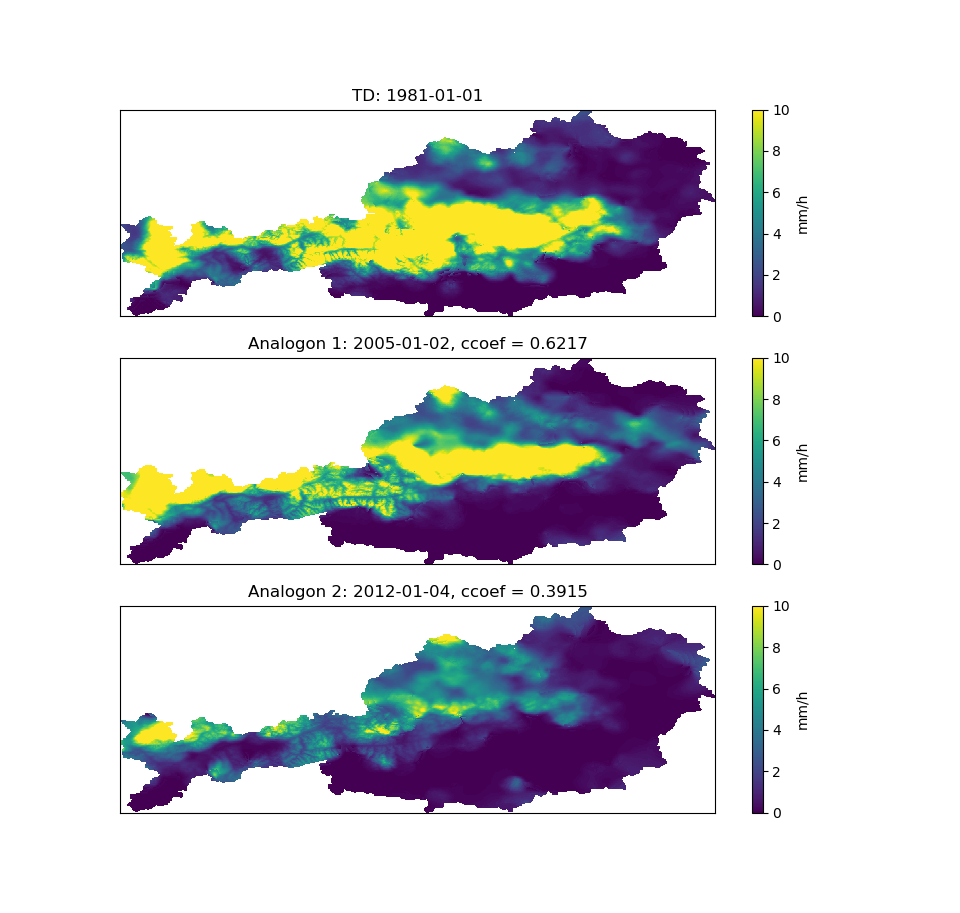

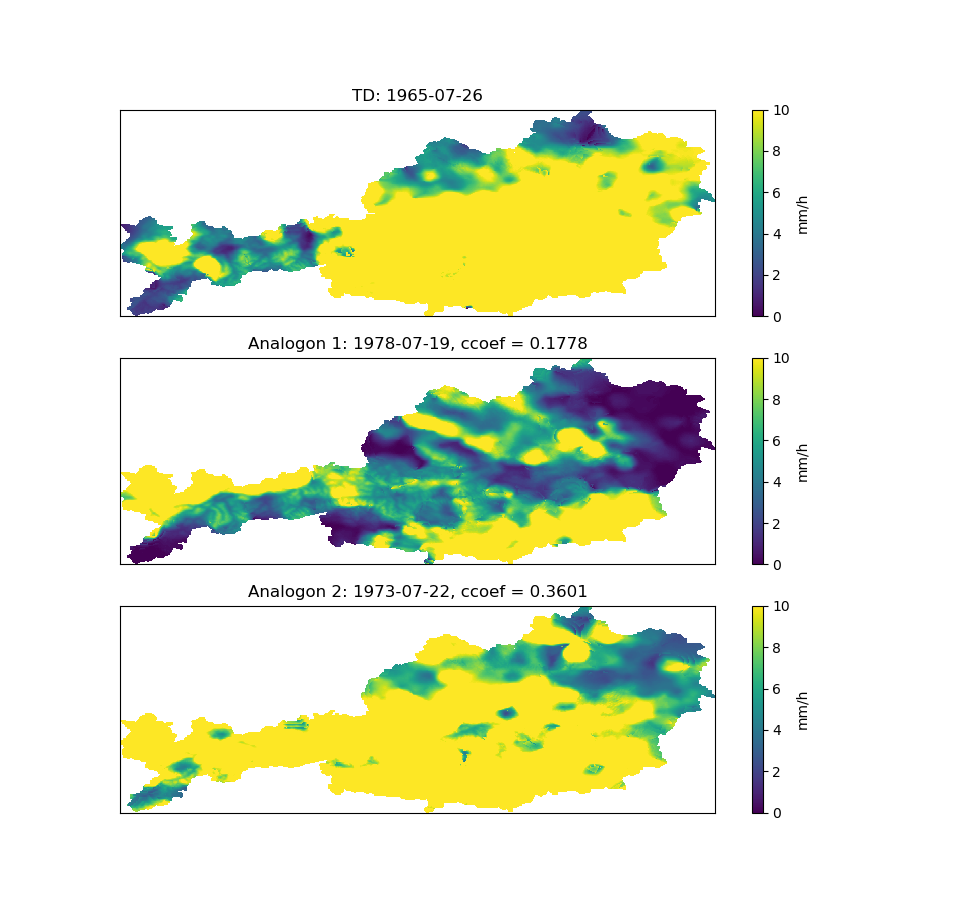

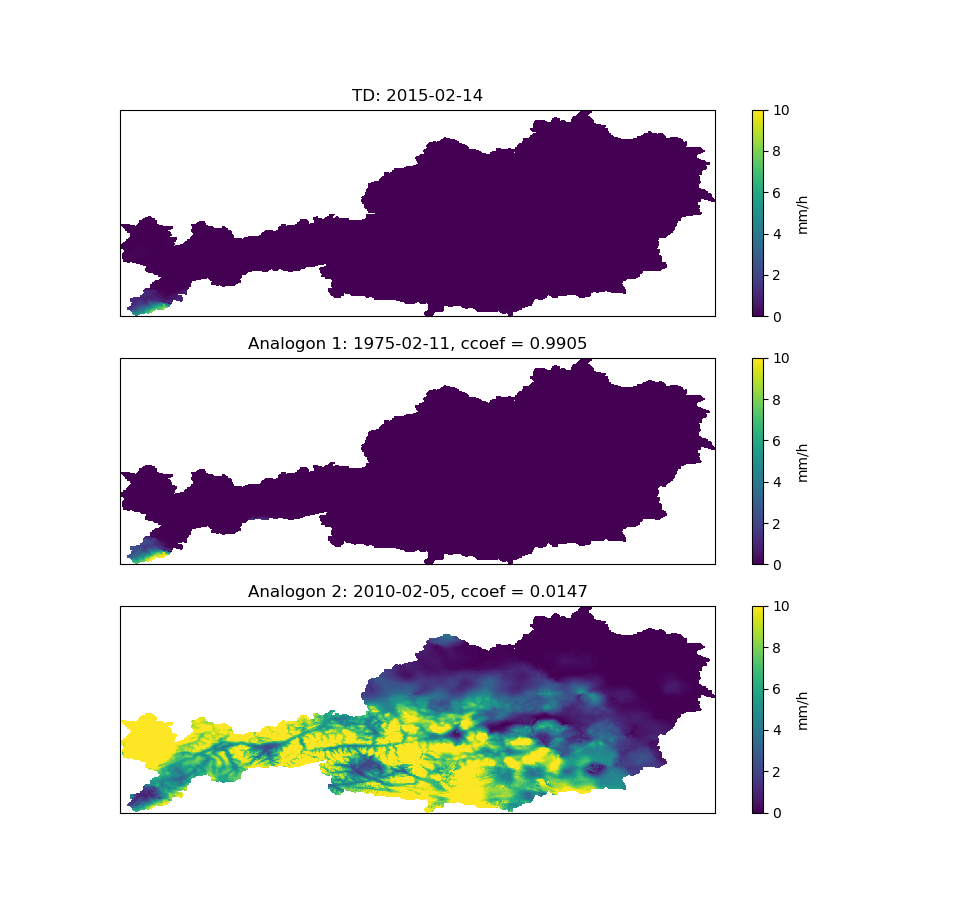

In [23]:
from PIL import Image
image = Image.open('Validation_spartacus-RR.png')
image2 = Image.open('Validation_spartacus-RR-2.png')
image3 = Image.open('Validation_spartacus-RR-maxcorr.png')
display(image)
display(image2)
display(image3)

## 6. EOF-Felder und Interpretation

Die EOF-Analyse spielt tatsächlich in vielen Bereichen eine wichtige Rolle (nicht nur in der Meteorologie). Die Interpretation und Durchführung der EOF-Analyse wurde bereits in der Vorlesung ausgiebig diskutiert und sollte an dieser Stelle nicht nochmals im Detail wiederholt werden. Grob gesagt handelt es sich bei der EOF-Analyse um eine Dimensionsreduktion hoch- bzw. multidimensionaler Daten. 

Die eigentlichen EOF-Felder, welche mittels Solver *MultivariateEof* berechnet werden können (Details zur Berechnung hier nicht wichtig), können folgendermaßen interpretiert werden. Eine Zeitreihe eines meteorologischen 2D Feldes kann in seine Basisfunktionen (EOFs) zerlegt werden, sodass die Linearkombination dieser Basisfunktionen (sind ebenfalls 2D Felder, so wie in unserem Beispiel) wiederum die anfängliche Zeitreihe des 2D Feldes ergibt. Die PCs sind dementsprechend Skalierungs- bzw. Gewichtungsfaktoren (für jeden Zeitschritt und jede EOF eine PC), mit denen die jeweiligen Basisfunktionen multipliziert bzw skaliert werden, um das Originalfeld zu erhalten. Die EOFs sind demzufolge 2D Felder, welche in Summe eine bestimmte Varianz erklären, und die PCs sind skalare Werte für eben jede EOF und jeden Zeitschritt. 

Die Pseudo-PCs sind ebenfalls principle components, aber nur für einen Zeitschritt (zB für einen TD), d.h. es gibt für jede EOF genau eine Pseudo-PC. Allerdings werden hierfür die vorher berechneteten EOFs (sozusagen) vorgegeben und daraus die bestmöglichen Gewichtungsfaktoren (=Pseudo-PCs) berechnet, sodass das meteorologische Feld des einen Zeitschritts bestmöglich mit den vorgegebenen EOFs reproduziert werden kann.

Die nachfolgenden Abbildungen zeigen die ersten 4 EOF-Felder des DOY 1. Jänner und dessen PC-Zeitreihe für den gesamten Zeitraum (x-Achse repräsentiert die Zeit). 


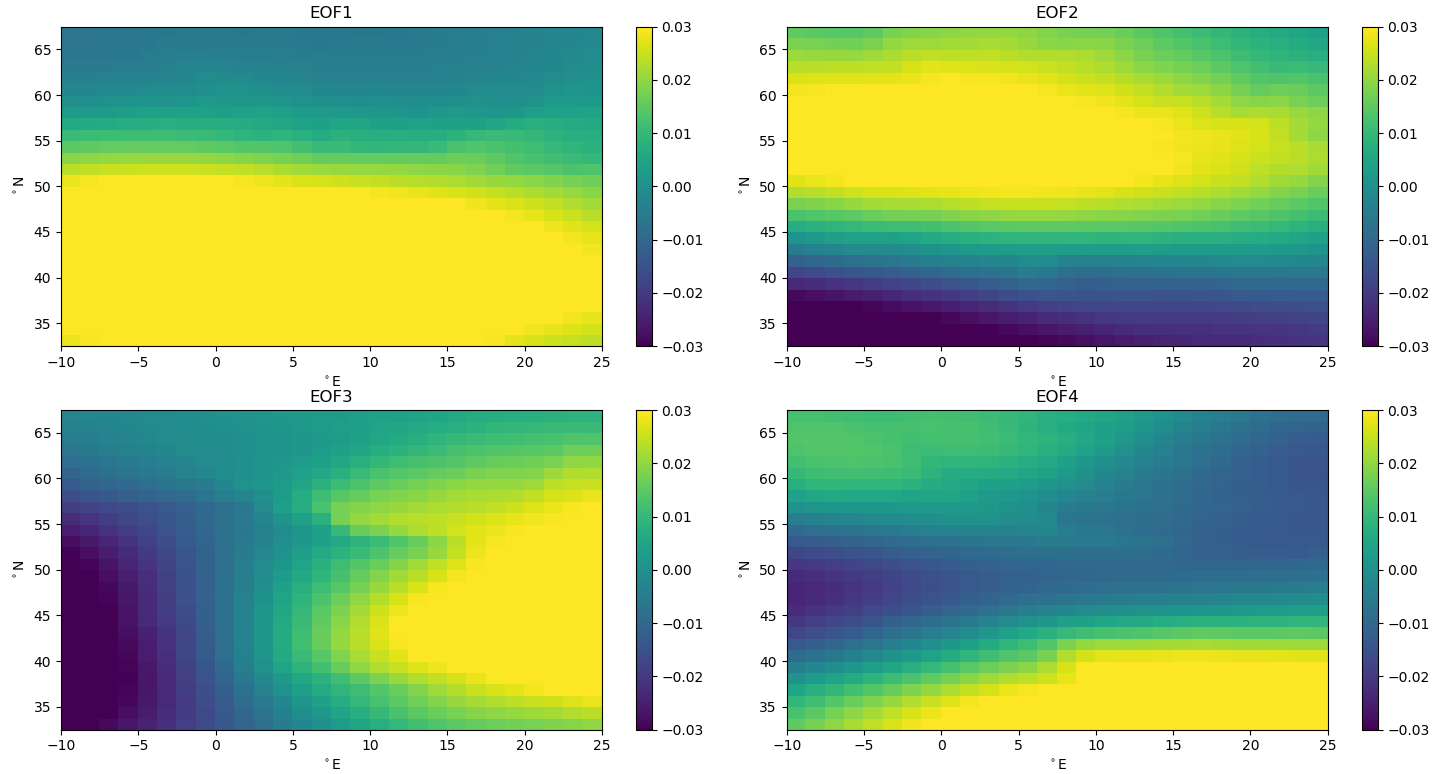

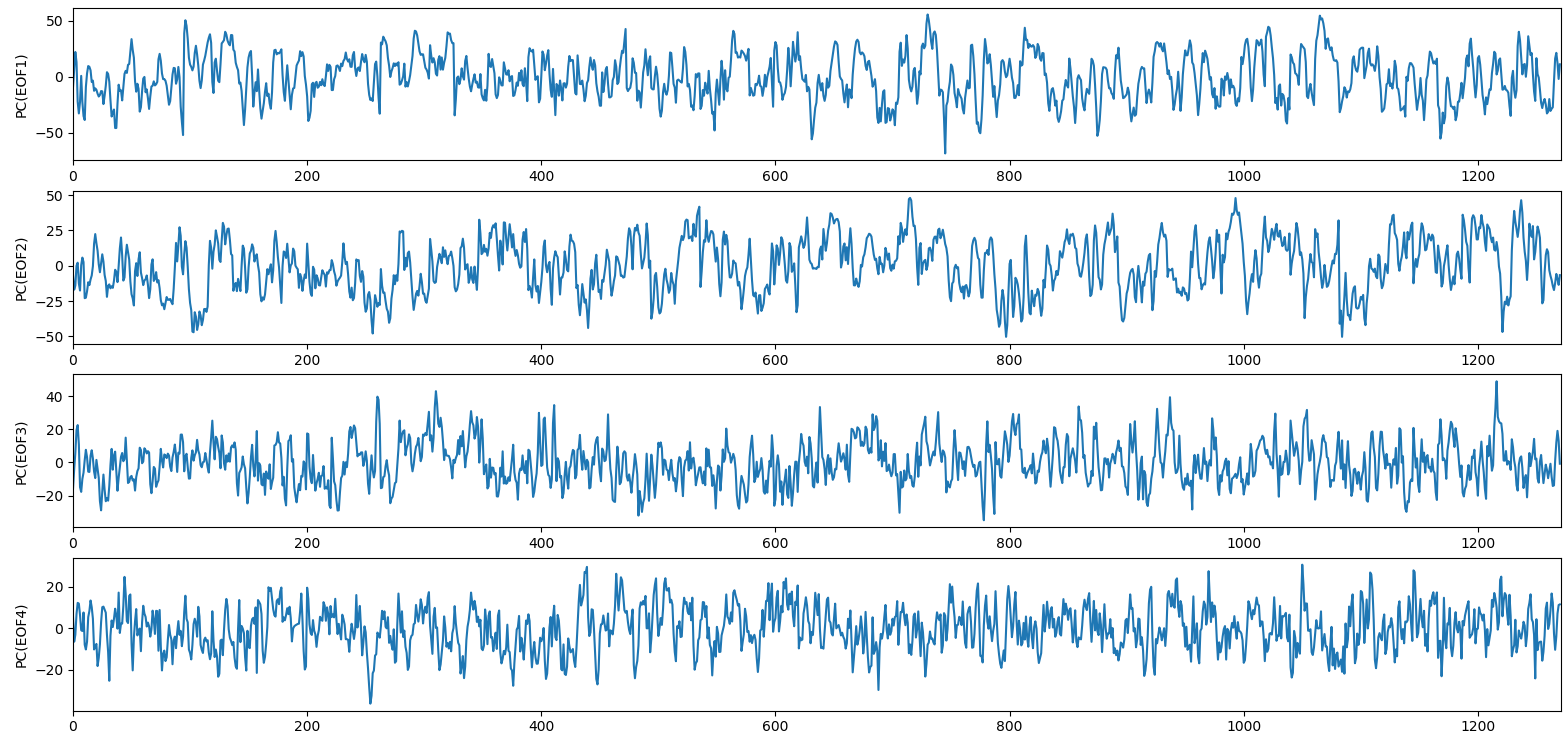

In [20]:
from PIL import Image
image = Image.open('EOFs.png')
image2 = Image.open('PCs.png')
display(image)
display(image2)

## 7. Etwaige Probleme

Schwerwiegende Probleme traten tatsächlich nicht auf. Durch das Auswählen eines räumlichen Subsets beim herunterladen der Daten, konsistenten Chunken der Arrays und anschließendem Speichern der normierten Tagesanomalien wurde im vorhinein verhindert, dass etwaige Memory-Fehler auftreten.

Der Umgang mit xarray (und iris) benötigt leider etwas Zeit, weshalb vorallem anfangs diverse syntax Fehler aufgetreten sind (aber im Grunde nichts Erwähnenswertes).

Kopfzerbrechen bereiteten tatsächlich nur die Schalttage. Aufgrund der Schaltjahre gibt es 366 DOYs wenn man ein
*groupby* durchführt. Allerdings wird der 29. Februar der jeweiligen Schaltjahre nicht einem eigenen DOY
zugewiesen, sondern immer dem DOY des 1. März der nicht-Schaltjahre. Das hat zur Folge, dass der 366.
DOY nur den 31. Dezember der Schaltjahre beinhaltet. Die Analoga des 31. Dezembers sind
somit eventuell nicht optimal (wenn man vernachlässigt, dass man sowieso nur ein 21 Tage Fenster verwendet hat). Das Problem ist selber etwas schwierig zu lösen und wird hoffentlich in zukünftigen Versionen von xarray besser gelöst.
